In [31]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
import numpy as np
from scipy.interpolate import interp1d

In [32]:
!ls /data/energie

001.xlsx  019.xlsx  037.xlsx  055.xlsx	073.xlsx  091.xlsx  109.xlsx
002.xlsx  020.xlsx  038.xlsx  056.xlsx	074.xlsx  092.xlsx  110.xlsx
003.xlsx  021.xlsx  039.xlsx  057.xlsx	075.xlsx  093.xlsx  111.xlsx
004.xlsx  022.xlsx  040.xlsx  058.xlsx	076.xlsx  094.xlsx  112.xlsx
005.xlsx  023.xlsx  041.xlsx  059.xlsx	077.xlsx  095.xlsx  113.xlsx
006.xlsx  024.xlsx  042.xlsx  060.xlsx	078.xlsx  096.xlsx  114.xlsx
007.xlsx  025.xlsx  043.xlsx  061.xlsx	079.xlsx  097.xlsx  115.xlsx
008.xlsx  026.xlsx  044.xlsx  062.xlsx	080.xlsx  098.xlsx  116.xlsx
009.xlsx  027.xlsx  045.xlsx  063.xlsx	081.xlsx  099.xlsx  117.xlsx
010.xlsx  028.xlsx  046.xlsx  064.xlsx	082.xlsx  100.xlsx  118.xlsx
011.xlsx  029.xlsx  047.xlsx  065.xlsx	083.xlsx  101.xlsx  119.xlsx
012.xlsx  030.xlsx  048.xlsx  066.xlsx	084.xlsx  102.xlsx  120.xlsx
013.xlsx  031.xlsx  049.xlsx  067.xlsx	085.xlsx  103.xlsx  unit_list.xlsx
014.xlsx  032.xlsx  050.xlsx  068.xlsx	086.xlsx  104.xlsx
015.xlsx  033.xlsx  051.xlsx  069.xlsx	087.xlsx  105

In [33]:
# alle gemeten variabele en de eenheid waarin ze zijn gemeten.

unit_list = pd.read_excel("/data/energie/unit_list.xlsx")
unit_list

,Device,Measurement,Unit,Unnamed: 3
0,waterFlow,volume_out,m3,NaN
1,flowHeatSpaceHeating,flow_temp,Celsius,NaN
2,NaN,return_temp,Celsius,NaN
3,NaN,total_energyGJ,Gigajoules,NaN
4,NaN,volume_out,m3,NaN
5,co2sensor,co2,ppm,NaN
6,NaN,humidity,%,NaN
7,NaN,temp,Celsius,NaN
8,NaN,voc,ppm,NaN
9,energyImmersion,power,Watt,NaN


In [34]:
df026smart = pd.read_excel("/data/energie/026.xlsx", sheet_name=['smartMeter'])

In [35]:
# De informatie van de smartmeter, waarbij timestamp omgezet is naar datetime en duplicates uit de dataset worden gehaald.

df026smart = df026smart['smartMeter']
df026smart['Datetime'] = [datetime.fromtimestamp(datum) for datum in df026smart['Timestamp']]
df026smart = df026smart.drop_duplicates(subset=['Datetime'])
df026smart

,Timestamp,energy_in_low,energy_in_norm,energy_out_low,energy_out_norm,power,total_energy_in,total_energy_out,Datetime
0,1546297492,425.281,476.241,33.145,65.091,440.8,901.522,98.236,2019-01-01 00:04:52
1,1546297795,425.328,476.241,33.145,65.091,549.8,901.569,98.236,2019-01-01 00:09:55
2,1546298091,425.362,476.241,33.145,65.091,419.6,901.603,98.236,2019-01-01 00:14:51
3,1546298392,425.415,476.241,33.145,65.091,629.5,901.656,98.236,2019-01-01 00:19:52
4,1546298691,425.463,476.241,33.145,65.091,561.0,901.704,98.236,2019-01-01 00:24:51
...,...,...,...,...,...,...,...,...,...
105062,1577832000,1319.443,1315.544,2114.209,4669.345,139.0,2634.987,6783.554,2019-12-31 23:40:00
105063,1577832300,1319.455,1315.544,2114.209,4669.345,139.0,2634.999,6783.554,2019-12-31 23:45:00
105064,1577832600,1319.468,1315.544,2114.209,4669.345,471.0,2635.012,6783.554,2019-12-31 23:50:00
105065,1577832900,1319.521,1315.544,2114.209,4669.345,970.0,2635.065,6783.554,2019-12-31 23:55:00


In [36]:
#hetzelfde als hier boven alleen nu voor solar ipv smartmeter.

df026solar = pd.read_excel("/data/energie/026.xlsx", sheet_name=['solar'])
df026solar = df026solar['solar'].rename({'power': 's_power', 'total_energy_in': 's_total_energy_in', 'total_energy_out': 's_total_energy_out'}, axis=1)
df026solar['Datetime'] = [datetime.fromtimestamp(datum) for datum in df026solar['Timestamp']]
df026solar = df026solar.drop_duplicates(subset=['Datetime'])
df026solar

,Timestamp,s_power,s_total_energy_in,s_total_energy_out,Datetime
0,1546297490,2.818,3.09,174.98,2019-01-01 00:04:50
1,1546297792,2.857,3.09,174.98,2019-01-01 00:09:52
2,1546298090,2.950,3.09,174.98,2019-01-01 00:14:50
3,1546298391,2.979,3.09,174.98,2019-01-01 00:19:51
4,1546298690,2.835,3.09,174.98,2019-01-01 00:24:50
...,...,...,...,...,...
105055,1577831701,2.560,21.86,7602.67,2019-12-31 23:35:01
105056,1577832002,3.360,21.86,7602.67,2019-12-31 23:40:02
105057,1577832301,2.840,21.86,7602.67,2019-12-31 23:45:01
105058,1577832601,2.720,21.86,7602.67,2019-12-31 23:50:01


In [37]:
# Het interpoleren van de smartmeter data, om zo missingvalues op te vullen en waardes om dezelfde tijdsperiode te hebben.

df026smart = df026smart.set_index('Datetime')
t = df026smart.index
r = pd.date_range(np.datetime64('2019-01-01T00:00:00.000000000'), np.datetime64('2020-01-01T00:00:00.000000000'), freq='1D')
df026smart = df026smart.reindex(t.union(r)).interpolate(method='linear', limit_direction='backward').loc[r]

In [38]:
# Hetzelfde als hierboven alleen dan solar ipv smartmeter.

df026solar = df026solar.set_index('Datetime')
t = df026solar.index
r = pd.date_range(np.datetime64('2019-01-01T00:00:00.000000000'), np.datetime64('2020-01-01T00:00:00.000000000'), freq='1D')
df026solar = df026solar.reindex(t.union(r)).interpolate(method='linear', limit_direction='backward').loc[r]

In [39]:
# df026smart = df026smart[0:14]
df026smart['energy_out'] = np.nan
df026smart['energy_in'] = np.nan

In [40]:
for x,y in zip(range(0,len(df026smart)-1), range(1,len(df026smart))):        
    df026smart['energy_out'][x] = df026smart['total_energy_out'][y] - df026smart['total_energy_out'][x]
    df026smart['energy_in'][x] = df026smart['total_energy_in'][y] - df026smart['total_energy_in'][x]
    
df026smart

,Timestamp,energy_in_low,energy_in_norm,energy_out_low,energy_out_norm,power,total_energy_in,total_energy_out,energy_out,energy_in
2019-01-01,1.546297e+09,425.2810,476.241,33.145,65.091,440.80,901.5220,98.236,1.893,8.2325
2019-01-02,1.546384e+09,433.5135,476.241,35.038,65.091,126.40,909.7545,100.129,1.640,8.7330
2019-01-03,1.546470e+09,435.5455,482.942,35.038,66.731,125.25,918.4875,101.769,3.124,11.1760
2019-01-04,1.546557e+09,437.9935,491.670,35.038,69.855,126.05,929.6635,104.893,0.002,12.5180
2019-01-05,1.546643e+09,439.8695,502.312,35.038,69.857,677.55,942.1815,104.895,0.087,11.8340
...,...,...,...,...,...,...,...,...,...,...
2019-12-28,1.577488e+09,1291.6170,1302.856,2111.989,4662.471,65.00,2594.4730,6774.460,1.897,11.9190
2019-12-29,1.577574e+09,1303.5360,1302.856,2113.886,4662.471,65.00,2606.3920,6776.357,0.323,13.7930
2019-12-30,1.577660e+09,1317.3290,1302.856,2114.209,4662.471,66.00,2620.1850,6776.680,3.350,7.4460
2019-12-31,1.577747e+09,1317.9710,1309.660,2114.209,4665.821,66.00,2627.6310,6780.030,3.524,7.5380


In [41]:
df026solar['s_energy_out'] = np.nan
df026solar['s_energy_in'] = np.nan

In [42]:
for x,y in zip(range(0,len(df026solar)-1), range(1,len(df026solar))):
    df026solar['s_energy_out'][x] = df026solar['s_total_energy_out'][y] - df026solar['s_total_energy_out'][x]
    df026solar['s_energy_in'][x] = df026solar['s_total_energy_in'][y] - df026solar['s_total_energy_in'][x]
    
df026solar

,Timestamp,s_power,s_total_energy_in,s_total_energy_out,s_energy_out,s_energy_in
2019-01-01,1.546297e+09,2.8180,3.09,174.98,2.70,0.07
2019-01-02,1.546384e+09,2.8515,3.16,177.68,2.55,0.07
2019-01-03,1.546470e+09,2.7430,3.23,180.23,5.03,0.06
2019-01-04,1.546557e+09,2.8075,3.29,185.26,0.63,0.08
2019-01-05,1.546643e+09,2.8310,3.37,185.89,0.84,0.07
...,...,...,...,...,...,...
2019-12-28,1.577487e+09,2.5200,21.61,7579.81,5.01,0.06
2019-12-29,1.577574e+09,2.7900,21.67,7584.82,3.82,0.07
2019-12-30,1.577660e+09,2.6000,21.74,7588.64,7.63,0.06
2019-12-31,1.577747e+09,2.8500,21.80,7596.27,NaN,NaN


Text(0, 0.5, 'energy (kwh)')

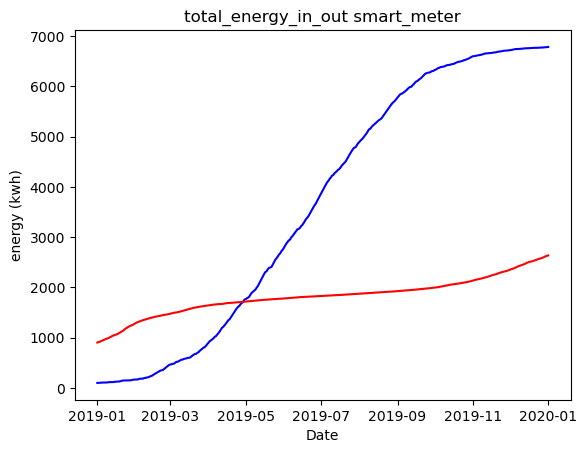

In [44]:
plt.title('total_energy_in_out smart_meter')
plt.plot(df026smart.index, df026smart['total_energy_out'], color='blue')
plt.plot(df026smart.index, df026smart['total_energy_in'], color = 'red')
plt.xlabel('Date')
plt.ylabel('energy (kwh)')

Text(0, 0.5, 'energy (kwh)')

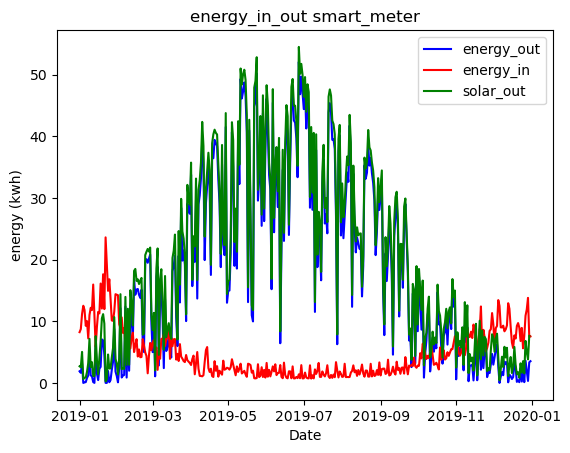

In [45]:
#met dagen geeft hij nog een normale grafiek, maar gebruiken je 5T dan geeft hij een negatief getal bij die rare spike in oktober
plt.title('energy_in_out smart_meter')
plt.plot(df026smart.index, df026smart['energy_out'], color='blue', label = 'energy_out')
plt.plot(df026smart.index, df026smart['energy_in'], color = 'red', label = 'energy_in')
plt.plot(df026solar.index, df026solar['s_energy_out'], color = 'green', label= 'solar_out')
plt.legend()
plt.xlabel('Date')
plt.ylabel('energy (kwh)')

Text(0, 0.5, 'energy (kwh)')

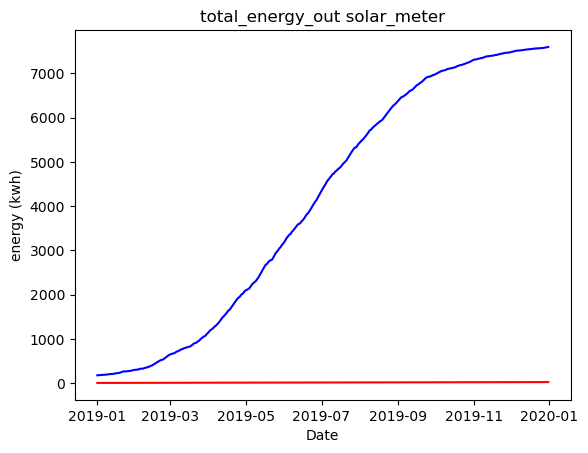

In [46]:
plt.title('total_energy_out solar_meter')
plt.plot(df026solar.index, df026solar['s_total_energy_out'], color='blue')
plt.plot(df026solar.index, df026solar['s_total_energy_in'], color = 'red')
plt.xlabel('Date')
plt.ylabel('energy (kwh)')

Text(0, 0.5, 'energy (kwh)')

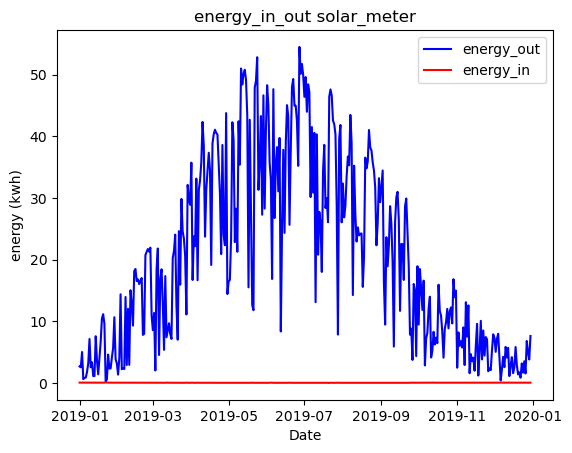

In [47]:
plt.title('energy_in_out solar_meter')
plt.plot(df026solar.index, df026solar['s_energy_out'], color='blue', label = 'energy_out')
plt.plot(df026solar.index, df026solar['s_energy_in'], color = 'red', label = 'energy_in')

plt.legend()
plt.xlabel('Date')
plt.ylabel('energy (kwh)')

Text(0, 0.5, 'energy (kwh)')

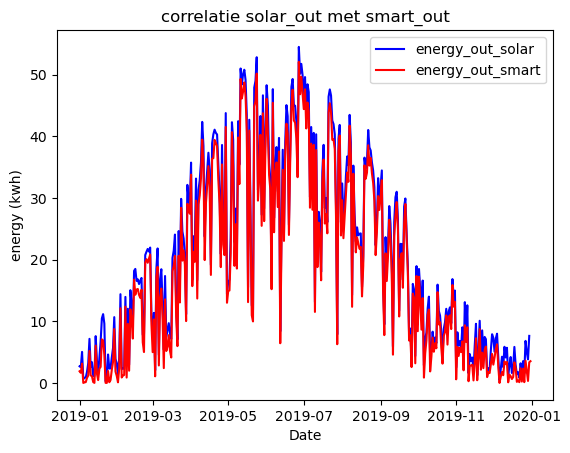

In [48]:
#het verschil is het directe verbruik van solar
plt.title('correlatie solar_out met smart_out')
plt.plot(df026solar.index, df026solar['s_energy_out'], color='blue', label = 'energy_out_solar')
plt.plot(df026smart.index, df026smart['energy_out'], color='red', label = 'energy_out_smart')
plt.legend()
plt.xlabel('Date')
plt.ylabel('energy (kwh)')